## Finding the perfect elimination order of a chordal graph (LexBFS)

In [48]:
import networkx as nx
import matplotlib.pyplot as plt

def _lexLargest(labels:dict, numbered:set):
    """
    params labels: a dictionary contains the label of each vertex
    params visited: a set of visited nodes
    return: the largest unvisited vertex according to Lexicographical Order
    """
    candidates =[i for i in list(labels) if i not in numbered]
    largest = candidates[0]
    for vertex in candidates[1:]:
        if not labels[largest]:
            largest = vertex
        else:
            p = 0
            while p <= len(labels[largest])-1 and p <= len(labels[vertex])-1:
                if labels[largest][p] > labels[vertex][p]:
                    break
                elif labels[largest][p] == labels[vertex][p]:
                    p += 1
                else:
                    largest = vertex
                    break
    return largest


def lexBFS(H, reverse=True):
    """
    params H: A chordal graph
    return: A dict maps the current order to the perfect elimination order
    """
    labels = {node:[] for node in H.nodes}
    N = len(H.nodes)
    init_node = list(H.nodes)[0]
    labels[init_node].append(N)
    order = {node:-1 for node in H.nodes}
    numbered = set()
    
    for i in range(N,0,-1):
        vertex = _lexLargest(labels, numbered)
        if reverse:
            order[vertex] = i
        else:
            order[vertex] = N - i + 1
        numbered.add(vertex)
        neighbors = list(H.neighbors(vertex))
        for neighbor in neighbors:
            if neighbor not in numbered:
                labels[neighbor].append(i)
    return order


def reLabel(G, newLabel:dict):
    """
    return: A graph with the same shape as G but new order
    """
    # relabelMap = {j:i for i,j in enumerate(newLabel)}
    G = nx.relabel_nodes(G, newLabel)
    return G


##  Reverse process of decomposition by clique seperator

### Creating some atoms

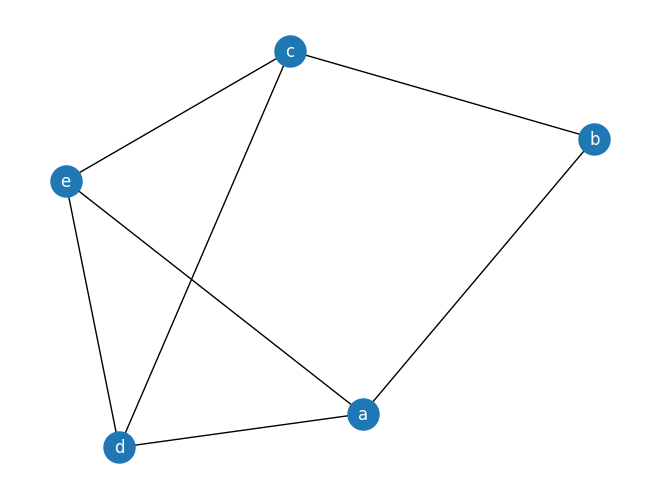

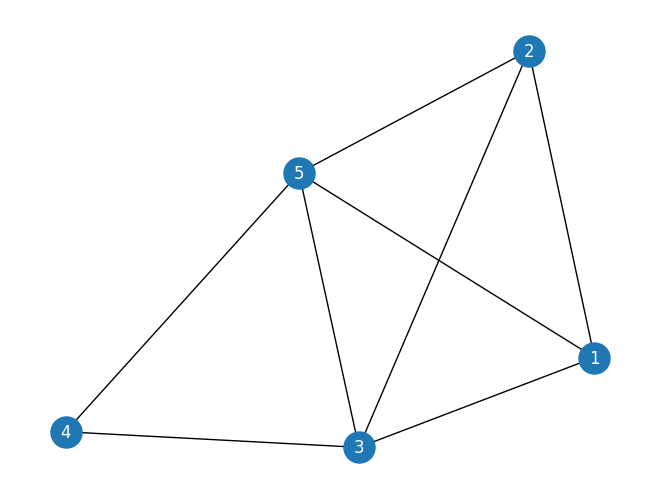

In [49]:
#  define some atom
G_1 = nx.Graph()
G_1.add_nodes_from(['a','b','c','d','e'])
G_1.add_edges_from([('a','b'),('b','c'),('c','d'),('d','a'),('a','e'),('c','e'),('d','e')])
nx.draw(G_1, with_labels=True,font_color='white', node_size=500)
plt.figure()
H_1 = G_1.copy()
H_1.add_edge('a','c',color='r')
order = lexBFS(H_1)
G_1 = reLabel(G_1, order)
H_1 = reLabel(H_1, order)
nx.draw(H_1, with_labels=True, font_color='white', node_size=500)

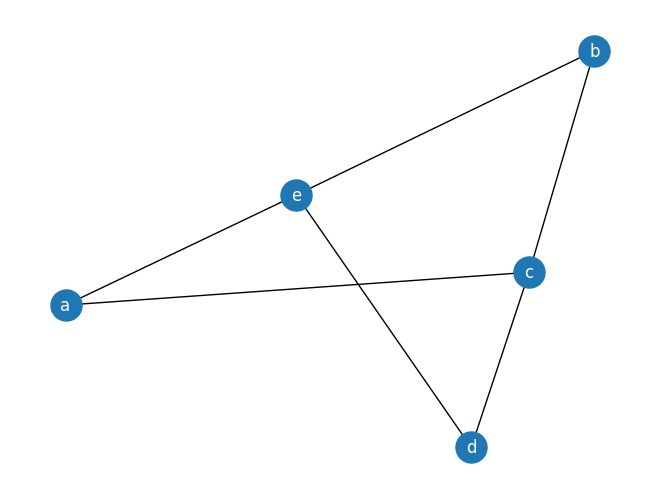

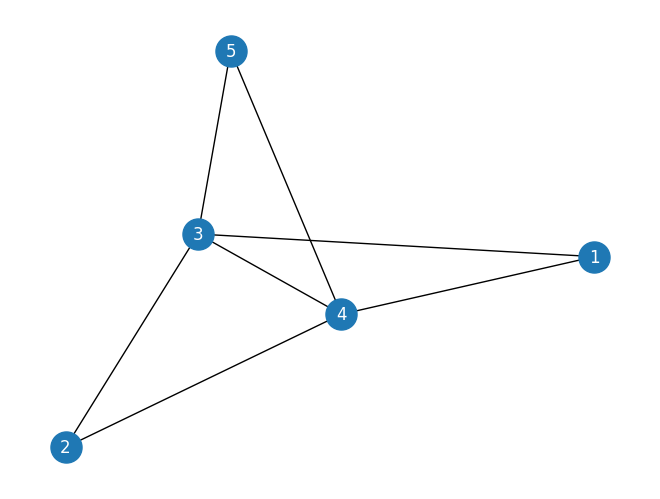

In [50]:
G_2 = nx.Graph()
G_2.add_nodes_from(['a','b','c','d','e'])
G_2.add_edges_from([('a','e'),('a','c'),('b','e'),('b','c'),('e','d'),('c','d')])
nx.draw(G_2, with_labels=True,font_color='white', node_size=500)
plt.figure()
H_2 = G_2.copy()
H_2.add_edge('e','c',color='r')
order = lexBFS(H_2)
G_2 = reLabel(G_2, order)
H_2 = reLabel(H_2, order)
nx.draw(H_2, with_labels=True, font_color='white', node_size=500)

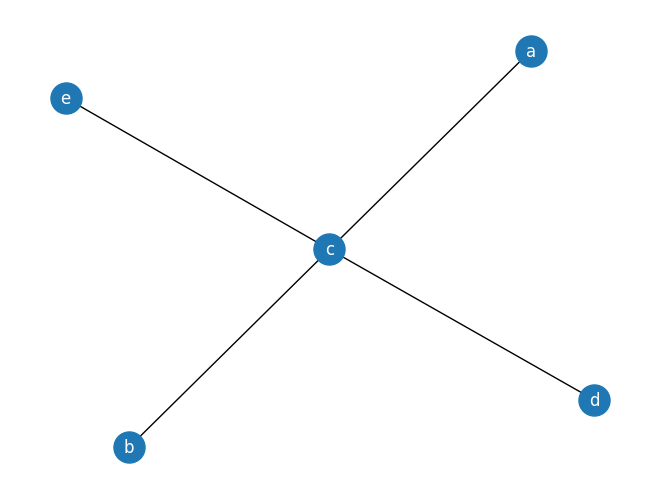

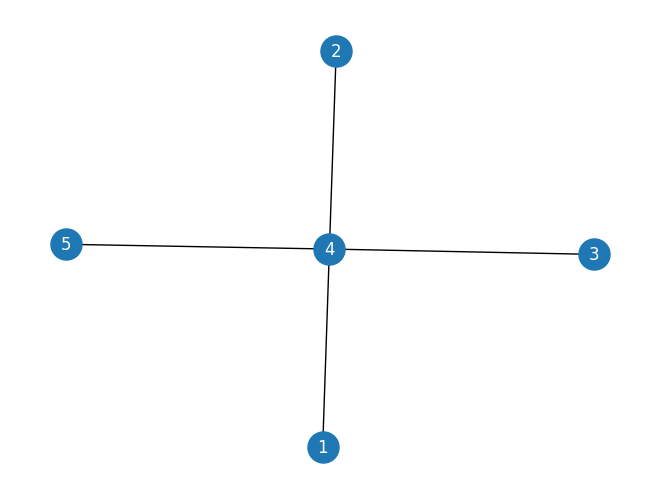

In [51]:
G_3 = nx.Graph()
G_3.add_nodes_from(['a','b','c','d','e'])
G_3.add_edges_from([('a','c'),('b','c'),('d','c'),('e','c')])
nx.draw(G_3, with_labels=True,font_color='white', node_size=500)
plt.figure()
H_3 = G_3.copy()
H_3.add_edge('e','c',color='r')
order = lexBFS(H_3)
G_3 = reLabel(G_3, order)
H_3 = reLabel(H_3, order)
nx.draw(H_3, with_labels=True, font_color='white', node_size=500)

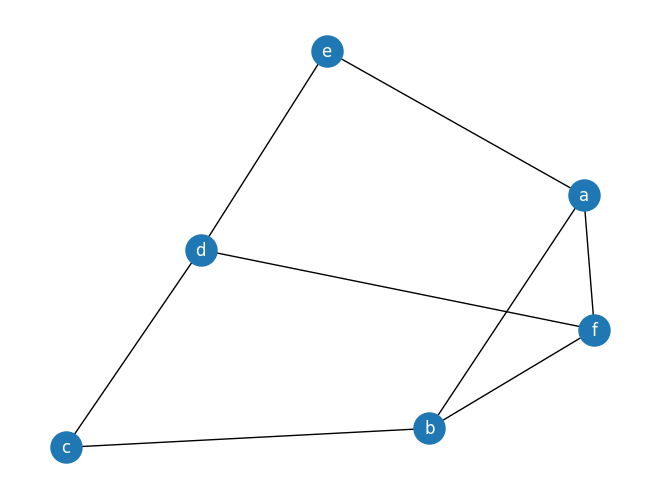

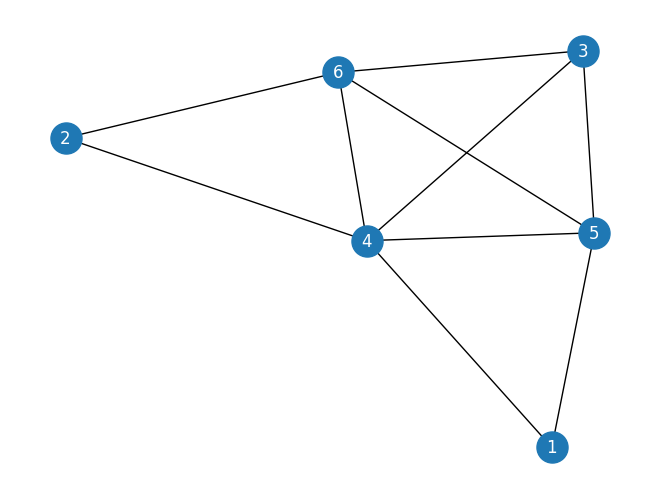

In [52]:
G_4 = nx.Graph()
G_4.add_nodes_from(['a','b','c','d','e','f'])
G_4.add_edges_from([('a','e'),('a','f'),('a','b'),('b','f'),('b','c'),('e','d'),('c','d'),('f','d')])
nx.draw(G_4, with_labels=True,font_color='white', node_size=500)
plt.figure()
H_4 = G_4.copy()
H_4.add_edge('d','a',color='r')
H_4.add_edge('d','b',color='r')
order = lexBFS(H_4)
G_4 = reLabel(G_4, order)
H_4 = reLabel(H_4, order)
nx.draw(H_4, with_labels=True, font_color='white', node_size=500)

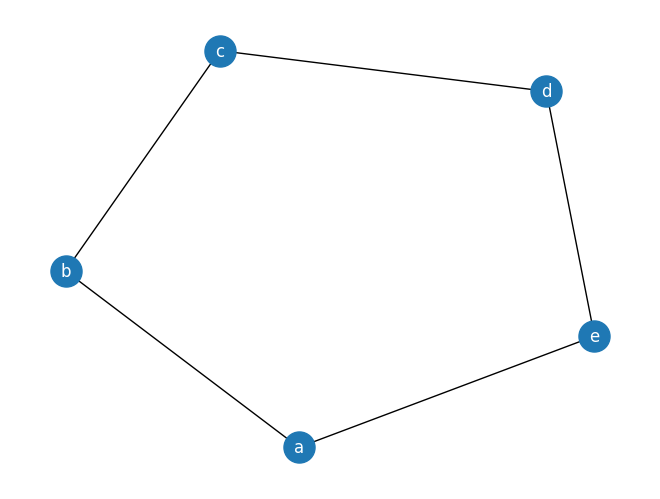

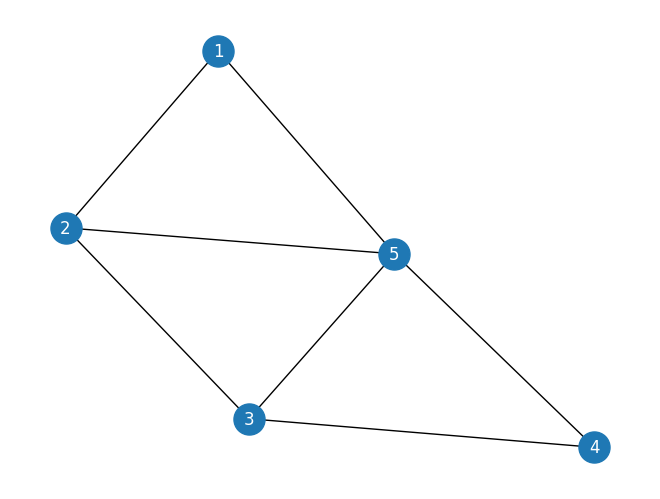

In [53]:
G_5 = nx.Graph()
G_5.add_nodes_from(['a','b','c','d','e'])
G_5.add_edges_from([('a','b'),('b','c'),('c','d'),('d','e'),('e','a')])
nx.draw(G_5, with_labels=True,font_color='white', node_size=500)
plt.figure()
H_5 = G_5.copy()
H_5.add_edge('a','c',color='r')
H_5.add_edge('a','d',color='r')
order = lexBFS(H_5)
G_5 = reLabel(G_5, order)
H_5 = reLabel(H_5, order)
nx.draw(H_5, with_labels=True, font_color='white', node_size=500)

### Generating a graph (G) along with it's chordal completion (H) and the minimum-fill in ordering (\sigma)

In [54]:
import random

atoms = [[G_1, H_1],[G_2, H_2], [G_3, H_3], [G_4, H_4], [G_5, H_5]]


def unique_label(G,H):
    """
    rename the tuple to ensure the name uniqueness when composing
    """
    label_G = {node:"{}l".format(i) for i, node in enumerate(G.nodes)}
    label_H = {node:"{}r".format(i) for i, node in enumerate(H.nodes)}
    G = nx.relabel_nodes(G, label_G, copy=True)
    H = nx.relabel_nodes(H, label_H, copy=True)
    return G, H

def sync_label(G, H):
    label = {node:i for i, node in enumerate(G.nodes)}
    G = nx.relabel_nodes(G, label, copy=True)
    H = nx.relabel_nodes(H, label, copy=True)
    return G, H


def compose(G:set, H:set):
    G1, G2 = G
    H1, H2 = H
    assert len(G1.nodes) == len(H1.nodes), 'Node Number Error'
    # The compose is based on the joint with the common node label
    
    # Rename 
    G1, G2 = unique_label(G1, G2) 
    H1, H2 = unique_label(H1, H2) 

    # choose the joint
    joint_1 = random.choice(list(G1.edges))
    joint_2 = random.choice(list(G2.edges))

    # rename the joint
    rename_map_1 = {joint_1[0]:"M", joint_1[1]:"N"}
    rename_map_2 = {joint_2[0]:"M", joint_2[1]:"N"}
    G1 = nx.relabel_nodes(G1, rename_map_1, copy=True)
    G2 = nx.relabel_nodes(G2, rename_map_2, copy=True)
    H1 = nx.relabel_nodes(H1, rename_map_1, copy=True)
    H2 = nx.relabel_nodes(H2, rename_map_2, copy=True)

    G = nx.compose(G1, G2)
    H = nx.compose(H1, H2)

    G, H = sync_label(G, H)

    return G, H


def generate_min_triang(L:int, atoms:list):
    """
    Randomly generate an undirected graph and it's minimum triangulation graph

    params L: graph size
    params atoms: a list of set, each set contains a atom graph and it's minimum fill-in graph
    return G: undirected graph
           H: G's minimum triangulation graph
           minimum_order: dict format
    """
    G, H = random.choice(atoms)

    for _ in range(L):
        G_cur, H_cur = random.choice(atoms)
        G, H = compose((G, G_cur),(H, H_cur))
    minimum_order = lexBFS(H)
    return G, H, minimum_order

In [55]:
import re
import pandas as pd
import os


def uniquify_node_id(G, order, increment):
    """
    Uniquify the node id accross the whole graphes
    default node id starts from 1 in a connected graph

    params G: input graph
    params order: dict, the map between order id and perfect order
    params increment: int
    return: A new graph with unique node id
    """
    rename_label = {i:i+increment+1 for i in G.nodes}
    G = nx.relabel_nodes(G, rename_label, copy=True)
    order = {key+increment+1:value for (key, value) in order.items()}

    return G, order


def write_edges(path, G, G_id):
    if not os.path.exists(path):
        df = pd.DataFrame(columns=['graph_id', 'source_node_id', 'destination_node_id'])
        df.to_csv(path, mode='a+', header=True, index=False)
        
    df = pd.DataFrame(columns=['graph_id', 'source_node_id', 'destination_node_id'])
    edges = list(G.edges)
    for i in range(len(edges)):
        df.loc[i] = [G_id+1, edges[i][0], edges[i][1]]
    for i in range(len(edges)):
        df.loc[len(edges)+i] = [G_id+1, edges[i][1], edges[i][0]]
    df.to_csv(path, mode='a+',header=False, index=False)


def write_nodes_attr(path, G_attr, G_id):
    """
    param path: str,  file save path
    param attr: G_dict, {node_id: minimum_order}
    """
    
    if not os.path.exists(path):
        df = pd.DataFrame(columns=['graph_id', 'node_id', 'node_label'])
        df.to_csv(path, mode='a+', header=True, index=False)
    
    df = pd.DataFrame(columns=['graph_id', 'node_id', 'node_label'])
    df['node_id'] = list(G_attr.keys())
    df['node_label'] = list(G_attr.values())
    df['graph_id'] = [G_id+1]*len(G_attr)
  
    df.to_csv(path, mode='a+', header=False, index=False)



def generate_report(edges_path, nodes_path, report_path):
  
    report = pd.DataFrame(columns=['graph_id', 'nodes_num', 'edges_num'])
    
    # add chunksize for extra large csv
    edges_table = pd.read_csv(edges_path)
    nodes_table = pd.read_csv(nodes_path)

    graph_ids = nodes_table['graph_id'].drop_duplicates()
    for graph_id in graph_ids:
        nodes = nodes_table.loc[nodes_table['graph_id']==graph_id]
        edges = edges_table.loc[edges_table['graph_id']==graph_id]
        report.loc[report.shape[0]] = [graph_id,nodes.shape[0],edges.shape[0]//2]
    
    report.to_csv(report_path, mode='a+', header=True, index=False)

    print("Total number of graphs: {} \nTotal number of edges: {} \nTotal number of nodes: {}".format(graph_ids.shape[0], edges_table.shape[0]//2, nodes_table.shape[0]))


    
    

## Writing the dataset

The dataset follows the format in [networkrepository](http://networkrepository.com/FRANKENSTEIN.php) site. The dataset was originally presented in the paper titled [Graph Invariant Kernels](https://www.ijcai.org/Proceedings/15/Papers/528.pdf).

**File explaination**

For a datset with M graphes, each graph contains N edges, P nodes

- *.edges (MN x 3)

| graph id | souce node_id | destination node_id | 
| ---- | ----| ----|

<!-- - *.graph_idx (MP x 2)

| node_id | graph index | 
| ---- | ----|

- *.graph_attrs (MP x 2)

| node_id | labels (minimum ordering) | 
| ---- | ----|


- *.graph_labels (M x 2)

| graph_id | labels (dummy 1 at the moment) | 
| ---- | ----| -->


- *.nodes_attr (MP x 2)

| graph_id  | node_id | node label | 
| ---- | ----|  ---- | 


**node_id** is globally unique

In [56]:
# generating dataset 

import numpy as np
from tqdm import tqdm


path = './data/raw'

edges_path = '{}/edges.csv'.format(path)
nodes_attr_path = '{}/nodes.csv'.format(path)
report_path = '{}/report.csv'.format(path)


N = 500
size_range = [50, 100]
atoms = [[G_1, H_1],[G_2, H_2], [G_3, H_3], [G_4, H_4], [G_5, H_5]]

# increment = 0
for i in tqdm(range(N)):
    L = np.random.randint(size_range[0], size_range[1])

    G, _, minimum_order = generate_min_triang(L, atoms)
    # G, minimum_order = uniquify_node_id(G, minimum_order)
    # increment += len(list(G.nodes))

    write_edges(path=edges_path,
                G=G,
                G_id=i)
    
    write_nodes_attr(path=nodes_attr_path,
                     G_attr=minimum_order,
                     G_id=i)
    
generate_report(edges_path, nodes_attr_path, report_path)

100%|██████████| 500/500 [02:41<00:00,  3.10it/s]


Total number of graphs: 500 
Total number of edges: 186730 
Total number of nodes: 120209
